In [1]:
import pandas as pd
import scipy as sp
from scipy import optimize as spo
import numpy as np
import matplotlib.pyplot as plt

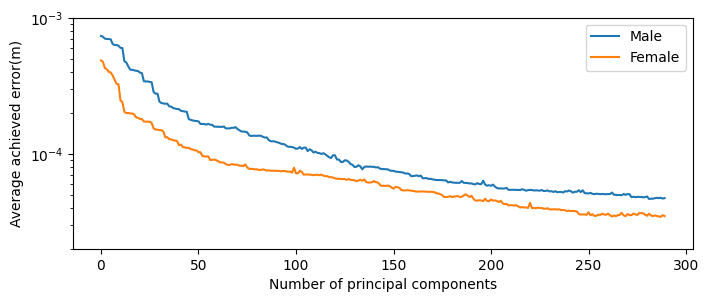

In [2]:
loss_300_df = pd.read_csv("data/status_data.csv", index_col=0)
filter_male = loss_300_df.gender == "male"
filter_female = loss_300_df.gender == "female"

loss_300_df_male = loss_300_df[filter_male]["loss"]
loss_300_df_male.rename("Male", inplace=True)
loss_300_df_male.reset_index(drop=True).plot(legend=True)
loss_300_df_female = loss_300_df[filter_female]["loss"]
loss_300_df_female.rename("Female", inplace=True)
loss_300_df_female.reset_index(drop=True).plot(legend=True, xlabel="Number of principal components", ylabel="Average achieved error(m)", logy=True, ylim=[2e-5, 1e-3], figsize=(8,3))
plt.show()

In [3]:
loss_steps_df = pd.read_csv("data/status_data_2.csv", index_col=0)
loss_steps_df

,gender,iteration,loss,elapsed_time,steps,steps interval
0,female,3430,0.000071,600.114703,5,50
1,female,3566,0.000206,600.066915,10,50
2,female,3544,0.000041,600.056231,15,50
3,female,3619,0.000101,600.154694,20,50
4,female,3618,0.000137,600.128335,25,50
...,...,...,...,...,...,...
595,female,3649,0.000015,600.054882,280,500
596,female,3622,0.000015,600.132600,285,500
597,female,3608,0.000016,600.098112,290,500
598,female,3632,0.000016,600.042415,295,500


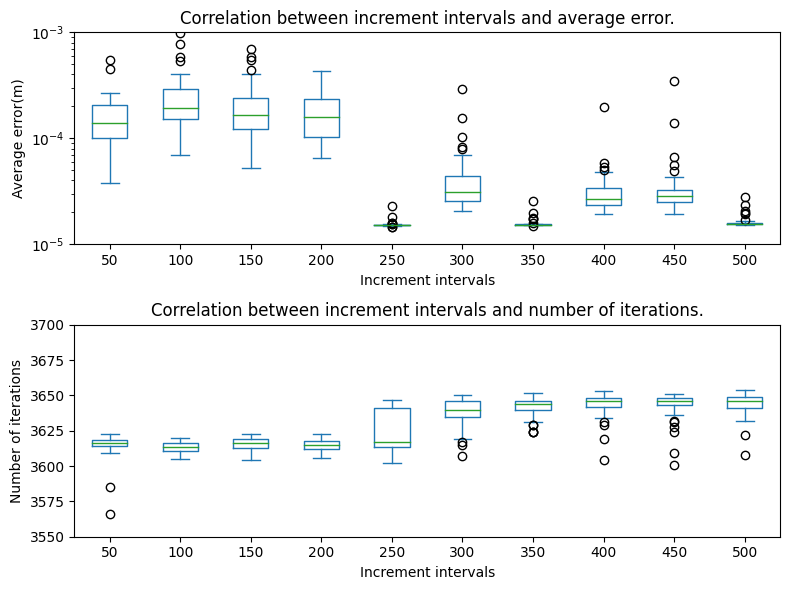

In [4]:
loss_steps_table = loss_steps_df.pivot(columns='steps', index='steps interval', values='loss')
time_steps_table = loss_steps_df.pivot(columns='steps', index='steps interval', values='iteration')

fig, axs = plt.subplots(2,1, figsize=(8, 6))
axe = axs.ravel()
loss_steps_table.T.plot(kind="box", ax=axe[0], ylim=[1e-5, 1e-3], logy=True)
time_steps_table.T.plot(kind="box", ax=axe[1], ylim=[3550, 3700])
axe[0].set_xlabel("Increment intervals")
axe[1].set_xlabel("Increment intervals")
axe[0].set_ylabel("Average error(m)")
axe[1].set_ylabel("Number of iterations")
axe[0].set_title("Correlation between increment intervals and average error.")
axe[1].set_title("Correlation between increment intervals and number of iterations.")
fig.tight_layout()
plt.show()

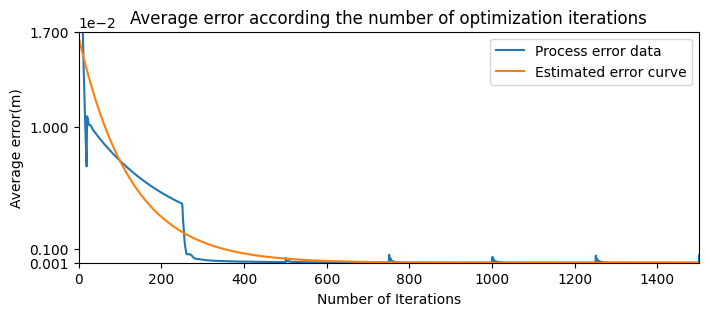

In [5]:
def exponential_function(x,a,b,c):
    return a*np.exp(-b*x) + c

loss_by_steps = pd.read_csv("data/status_data_3.csv", index_col=0)
x = loss_by_steps.index/1000
y = loss_by_steps.mean(axis=1)
fitting_parameters, _ = spo.curve_fit(exponential_function, x.to_numpy(), y.to_numpy())

fig, axe = plt.subplots(1, figsize=(8, 3))

fitted_y = exponential_function(x, *fitting_parameters)
fitted_y -= fitted_y.min()
fitted_data = pd.DataFrame({'x': loss_by_steps.index, 'y': fitted_y})
fitted_data.set_index('x', inplace=True)
fitted_data.columns = ['Estimated error curve']
loss_by_steps.mean(axis=1).rename("Process error data").plot(ax=axe, legend=True)
fitted_data.plot(ax=axe)

axe.set_ylim([1e-5, 1.7e-2])
axe.set_xlim([0, 1500])
axe.set_xlabel("Number of Iterations")
axe.set_ylabel("Average error(m)")
axe.set_yticks((1e-5, 1e-3, 1e-2, 1.7e-2))
axe.ticklabel_format(axis="y", style="scientific", scilimits=[-2, -5])
axe.set_title("Average error according the number of optimization iterations")
plt.show()

In [6]:
loss_steps_df = pd.read_csv("data/status_data_4.csv", index_col=0)
time_to_goal = loss_steps_df.pivot(columns='steps', index=['steps interval', 'rep'], values='elapsed_time')

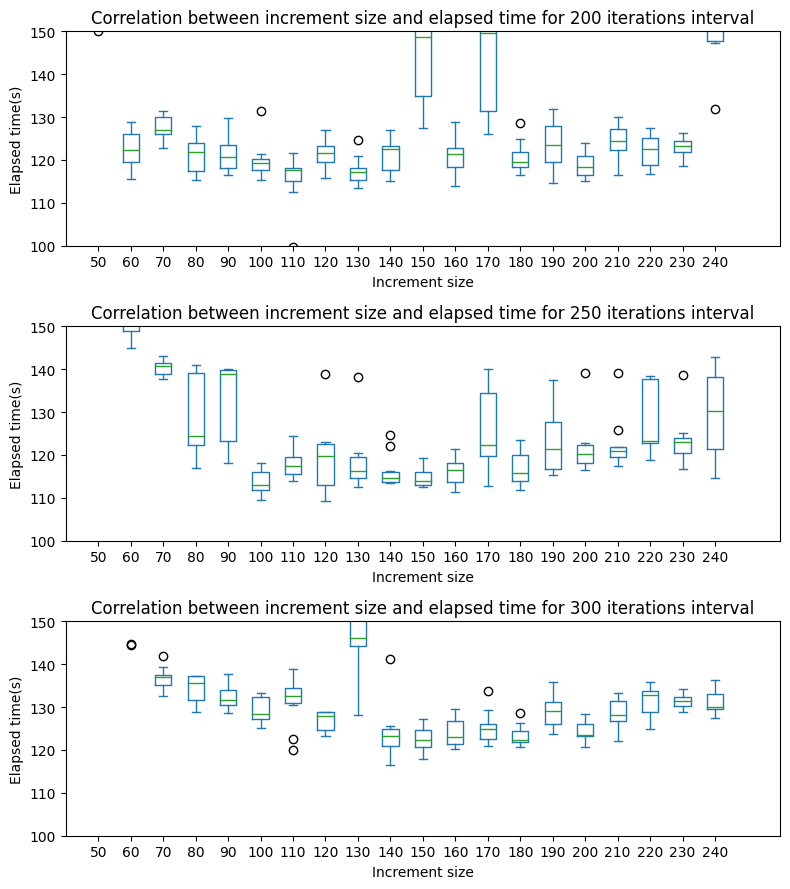

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(8, 9))
axe = axs.ravel()
time_to_goal.loc[200].plot(kind='box', ax=axe[0], ylim=[100, 150], xlim=[0,22])
time_to_goal.loc[250].plot(kind='box', ax=axe[1], ylim=[100, 150], xlim=[0,22])
time_to_goal.loc[300].plot(kind='box', ax=axe[2], ylim=[100, 150], xlim=[0,22])
axe[0].set_title("Correlation between increment size and elapsed time for 200 iterations interval")
axe[1].set_title("Correlation between increment size and elapsed time for 250 iterations interval")
axe[2].set_title("Correlation between increment size and elapsed time for 300 iterations interval")
axe[0].set_xlabel("Increment size")
axe[1].set_xlabel("Increment size")
axe[2].set_xlabel("Increment size")
axe[0].set_ylabel("Elapsed time(s)")
axe[1].set_ylabel("Elapsed time(s)")
axe[2].set_ylabel("Elapsed time(s)")
fig.tight_layout()
plt.show()

In [8]:
time_to_goal.index = time_to_goal.index.droplevel(1)

In [9]:
time_to_goal.reset_index().groupby("steps interval").mean().T.loc[100].sort_values().to_frame()

,100
steps interval,
250,113.781693
200,119.911758
300,137.118977


In [10]:
time_to_goal.loc[250].mean().sort_values().to_frame()

,0
steps,
100,113.781693
150,114.633566
160,116.057932
140,116.179463
180,116.809225
110,118.221986
130,118.575461
200,121.691666
210,122.549847
